# k-means

In [1]:
import pandas as pd
file = "Smart_City_index_headers.csv"
data = pd.read_csv( file)

data.head()
data.shape

(102, 11)

## Scale the dataset

In [2]:

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Columns that you want to scale
columns_to_scale = [
    'Smart_Mobility', 'Smart_Environment', 'Smart_Government', 
    'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 
    'SmartCity_Index_relative_Edmonton'
]

# Apply the scaler to the dataset
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


## Determine best value of k

Optimal number of clusters: 5


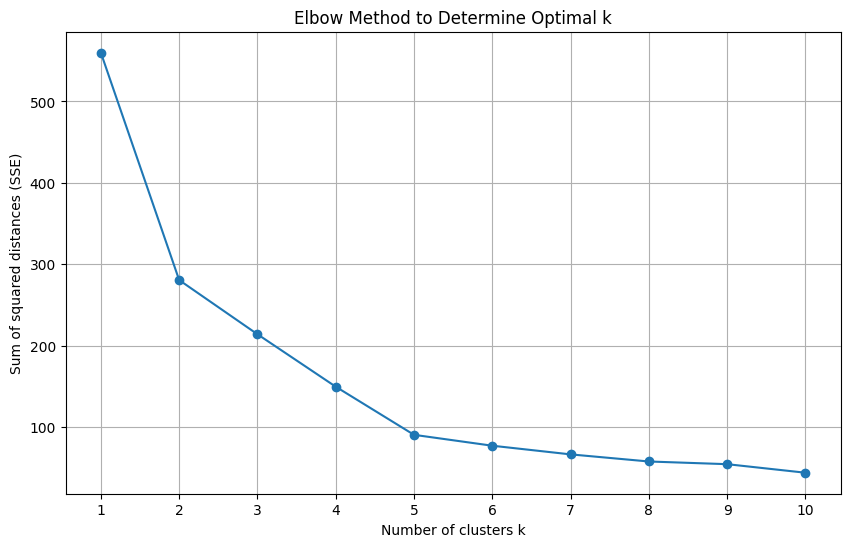

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

columns_to_check = [
    'Smart_Mobility', 'Smart_Environment', 'Smart_Government',
    'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index',
    'SmartCity_Index_relative_Edmonton'
]

# Assuming 'filtered_data_iso' and 'columns_to_check' are defined
# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[columns_to_check])

# Determine the optimal number of clusters using the Elbow Method
sse = []  # Sum of squared distances
k_range = range(1, 11)  # Checking for k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('knee.pdf', dpi=1200)  # dpi=1200 for high resolution
# Choose k at the elbow point or use an automated method like 'KneeLocator'
from kneed import KneeLocator
k_optimal = KneeLocator(k_range, sse, curve='convex', direction='decreasing').knee
print("Optimal number of clusters:", k_optimal)


## Apply PCA, then K-Means and finally use Voronoi diagrams

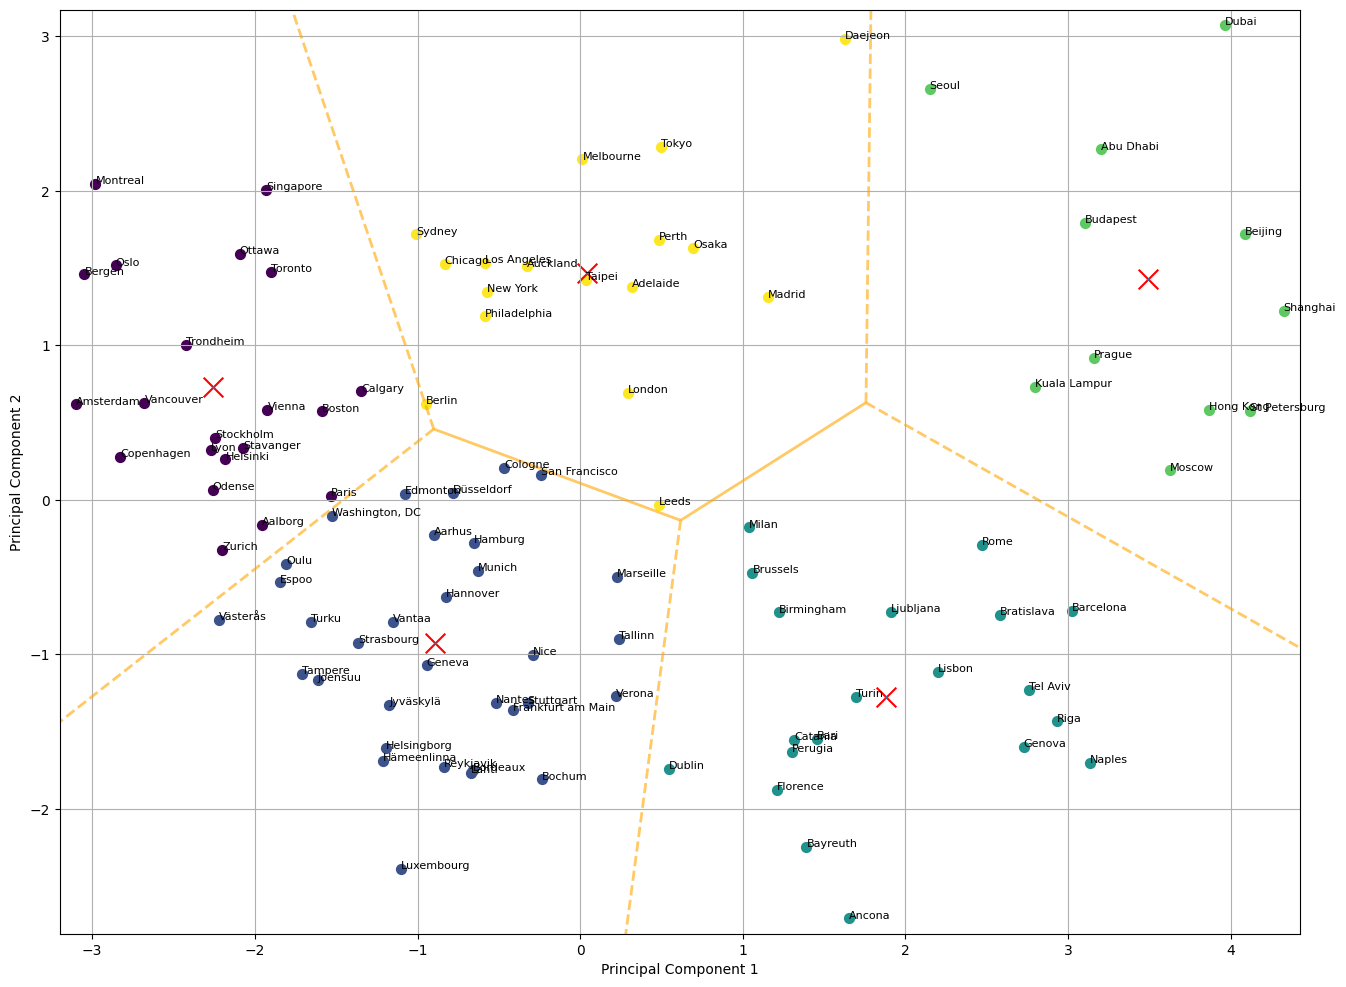

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi, voronoi_plot_2d


# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[columns_to_check])


# K-Means Clustering with the optimal k
kmeans_optimal = KMeans(n_clusters=k_optimal)
clusters_kmeans = kmeans_optimal.fit_predict(data_pca)

# Custom Voronoi plot function to extend regions
def extended_voronoi_plot_2d(vor, **kwargs):
    fig, ax = plt.subplots(figsize=(16, 12))
    voronoi_plot_2d(vor, ax=ax, **kwargs)
    
    # Extend the Voronoi regions by adding points at infinity
    # Create a bounding box
    margin = 0.1
    x_min, x_max = data_pca[:, 0].min() - margin, data_pca[:, 0].max() + margin
    y_min, y_max = data_pca[:, 1].min() - margin, data_pca[:, 1].max() + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Add axis labels
    ax.set_xlabel('Principal Component 1')  # Label for the x-axis
    ax.set_ylabel('Principal Component 2')  # Label for the y-axis
    
    # Plot the data points and labels
    total_points_plotted = 0
    colors = plt.cm.viridis(np.linspace(0, 1, k_optimal))
    for i, color in enumerate(colors):
        cluster_points = data_pca[clusters_kmeans == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=color)
        
        # Annotate with city names
        for j in range(cluster_points.shape[0]):
            ax.text(cluster_points[j, 0], cluster_points[j, 1], data.iloc[clusters_kmeans == i].iloc[j]['City'], fontsize=8)
        
        total_points_plotted += cluster_points.shape[0]
    
    # Marking the centroids
    ax.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c='red', marker='x')
   #ax.set_title(f'K-Means Clustering with {k_optimal} Clusters and Extended Voronoi Diagram')
    ax.grid(True)
    
    plt.savefig('voronoi_diagram.pdf', dpi=1200)  # dpi=300 for high resolution


# Create Voronoi diagram
if np.all(np.isfinite(kmeans_optimal.cluster_centers_)):  # Check if centroids are finite numbers
    vor = Voronoi(kmeans_optimal.cluster_centers_)
    extended_voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
else:
    print("Error: Centroid calculation failed, possibly due to NaNs or infinite values in data.")

## Print the clusters

In [ ]:
# Add cluster labels to the dataframe
data['Cluster'] = clusters_kmeans# Print the cities grouped by cluster
for cluster in range(k_optimal):
    cluster_cities = data[data['Cluster'] == cluster]['City'].tolist()
    print(f"Cluster {cluster + 1}:")
    for city in cluster_cities:
        print(f"  - {city}")

In [ ]:
please do the same (latex table and comment) for these clusters: